# RNN - Recurrent Neural Networks
Las Redes Neuronales Recurrentes (RNN) son redes neuronales con memoria. En lugar de tener una entrada y una salida, como una red neuronal normal, las RNN tienen una entrada y una salida, pero también tienen una memoria interna que les permite recordar información sobre lo que han visto hasta ahora. Esto les permite tomar decisiones basadas en lo que han visto hasta ahora. Siempre se utilizan los mismos pesos para cada input, independientemente del número de inputs que se tengan.

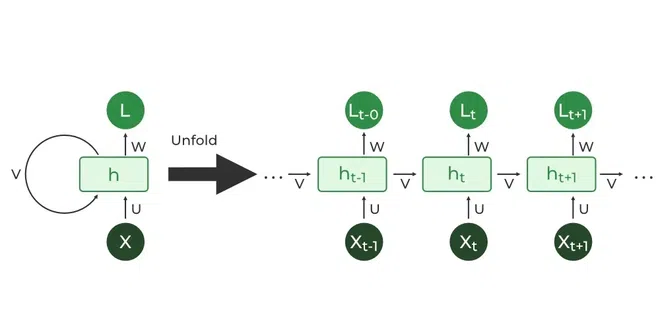

El problema de las RNN es que tienen problemas para recordar información a largo plazo. Esto se debe a que la información se va perdiendo a medida que se avanza en la red (Vanishing Gradient Problem).

In [41]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

## Cargar los datos y dividirlos en training y validation
Se cargan los datos preprocesados y se dividen en dos conjuntos: training y validation.

In [26]:
df = pd.read_csv('data/goemotions_clean.csv')
df.head()

,text,emotion
0,Shhh give idea!,anger
1,"Thank much, kind stranger. I really need",gratitude
2,"Ion know would better buy trim make yourself, ...",neutral
3,I'm honestly surprised. We fallen much farther,excitement
4,Jurisprudence fetishist gets technicality.,neutral


In [27]:
# Dividir el dataset en train y validation
X_train, X_val, y_train, y_val = train_test_split(df['text'], df['emotion'], test_size=0.2, random_state=0)

## Preprocesamiento de los datos
Para poder utilizar los datos en la red neuronal, es necesario preprocesarlos. El texto debe ser convertido a números, ya que las redes neuronales no pueden trabajar con texto. Para ello, se utiliza la clase Tokenizer de Keras, que convierte el texto a secuencias de números. Además, se añade padding a las secuencias para que todas tengan la misma longitud.

### Tokenizer

In [28]:
## Tokenizar el texto
max_words = 1000 # Número máximo de palabras a considerar en el vocabulario (las más frecuentes), el resto se consideran desconocidas

tokenizer = Tokenizer(num_words=max_words)

tokenizer.fit_on_texts(X_train)

In [29]:
# Vocabulario
word_index = tokenizer.word_index
print(f'Se encontraron {len(word_index)} tokens únicos.')

Se encontraron 30850 tokens únicos.


In [30]:
# Convertir los textos a secuencias de números
train_sequences = tokenizer.texts_to_sequences(X_train)
val_sequences = tokenizer.texts_to_sequences(X_val)

In [46]:
# Convertir output a números
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_val = label_encoder.transform(y_val)

### Padding

In [32]:
# Comprobar la longitud de las secuencias
max_seq_len = max([len(seq) for seq in train_sequences])
print(f'La secuencia más larga tiene {max_seq_len} tokens.')

La secuencia más larga tiene 19 tokens.


In [34]:
# Padding para que todas las secuencias tengan la misma longitud (agregar ceros al final de la secuencia para ajustarla al tamaño máximo)
X_train_padded = pad_sequences(train_sequences, maxlen=max_seq_len)
X_val_padded = pad_sequences(val_sequences, maxlen=max_seq_len)

In [38]:
# Muestra de algunas secuencias para comprobar que todas tienen la misma longitud
for seq in X_train_padded[:5]:
    print(seq)

[  0   0   0   0   0   0   0   0  26 330 244  17 228   4 296 230  54 262
 443]
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  78  37
 580]
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  59 127
  89]
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0  11  28 280   7
 460]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


## Modelo de la red neuronal SimpleRNN
Se crea un modelo de red neuronal SimpleRNN con una capa de embedding, una capa de SimpleRNN y una capa densa de salida. Se compila el modelo y se entrena con los datos de training.

In [39]:
# Número de clases (emociones diferentes)
num_classes = len(df['emotion'].unique())
print(f'Número de clases (emociones): {num_classes}')

Número de clases (emociones): 23


In [40]:
# Definir el modelo
model = Sequential() # Inicializar el modelo
model.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_seq_len)) # Capa de Embedding
model.add(SimpleRNN(64)) # Capa SimpleRNN con 64 unidades (dimensiones)
model.add(Dense(num_classes, activation='softmax')) # Capa de salida con una neurona por cada clase y función de activación softmax para obtener probabilidades

# Compilar el modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [47]:
# Entrena el modelo
batch_size = 32 # número de muestras que se usarán en cada iteración
epochs = 10 # número de iteraciones completas al conjunto de datos de entrenamiento
history = model.fit(X_train_padded, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_val_padded, y_val))

Epoch 1/10
2720/2720 [==============================] - 23s 8ms/step - loss: 2.5298 - accuracy: 0.3073 - val_loss: 2.4403 - val_accuracy: 0.3230
Epoch 2/10
2720/2720 [==============================] - 23s 8ms/step - loss: 2.3507 - accuracy: 0.3294 - val_loss: 2.3910 - val_accuracy: 0.3235
Epoch 3/10
2720/2720 [==============================] - 24s 9ms/step - loss: 2.2958 - accuracy: 0.3341 - val_loss: 2.3916 - val_accuracy: 0.3247
Epoch 4/10
2720/2720 [==============================] - 22s 8ms/step - loss: 2.2572 - accuracy: 0.3376 - val_loss: 2.4025 - val_accuracy: 0.3148
Epoch 5/10
2720/2720 [==============================] - 26s 10ms/step - loss: 2.2245 - accuracy: 0.3396 - val_loss: 2.4282 - val_accuracy: 0.3099
Epoch 6/10
2720/2720 [==============================] - 24s 9ms/step - loss: 2.1976 - accuracy: 0.3424 - val_loss: 2.4542 - val_accuracy: 0.3111
Epoch 7/10
2720/2720 [==============================] - 25s 9ms/step - loss: 2.1732 - accuracy: 0.3437 - val_loss: 2.4645 - val_a

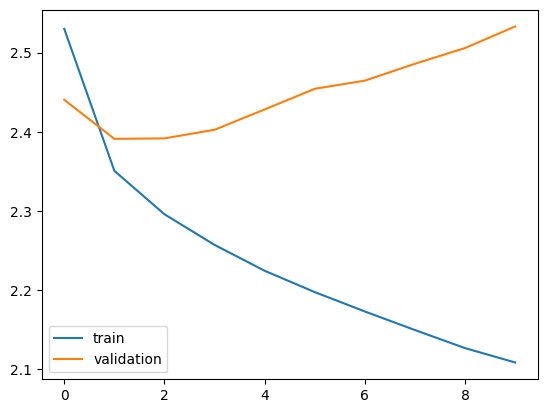

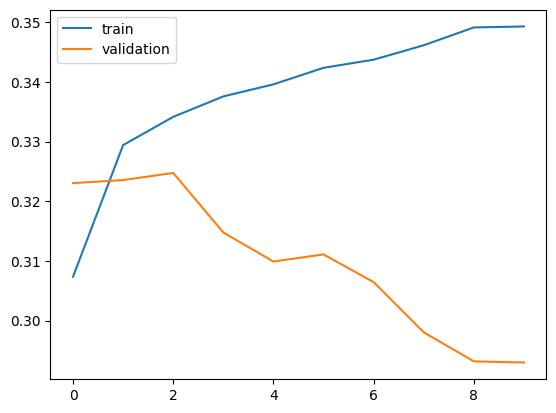

In [48]:
# Mostrar pérdida y precisión en el conjunto de entrenamiento y validación
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()